## Data Splitting and Pre-processing

### Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

In [4]:
print(df.shape)

(537, 8)


In [5]:
print (df.columns)

Index(['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days',
       'totalrain_mm', 'totalsun_hours', 'wildfire_quantity'],
      dtype='object')


In [6]:
#copy df_original into new df_features
df_features = df.copy()

### Re-create lag features in notebook

In [7]:
#creating lag feature 1, 6, 12

#tmax
df_features['tmax_degC_lag_1'] = df_features['tmax_degC'].shift(1)   # 1-month lag
df_features['tmax_degC_lag_6'] = df_features['tmax_degC'].shift(6)   # 6-month lag
df_features['tmax_degC_lag_12'] = df_features['tmax_degC'].shift(12) # 12-month lag

#totalrain
df_features['totalrain_mm_lag1'] = df_features['totalrain_mm'].shift(1)   # 1-month lag
df_features['totalrain_mm_lag6'] = df_features['totalrain_mm'].shift(6)   # 6-month lag
df_features['totalrain_mm_lag12'] = df_features['totalrain_mm'].shift(12) # 12-month lag

In [8]:
#feature 'year_month'
df_features['year_month'] = df_features['year'].astype(str) + '_' + df_features['month'].astype(str).str.zfill(2)

#feature 'totalrain_mm_avg4'
#feature 'tmax_degC_avg4'
df_features['totalrain_mm_avg4'] = df_features['totalrain_mm'].rolling(window=4, min_periods=1).mean()
df_features['tmax_degC_avg4'] = df_features['tmax_degC'].rolling(window=4, min_periods=1).mean()

In [9]:
df_features['year_month2'] = df_features['year'].astype(str) + '_' + df_features['month'].astype(str).str.zfill(2)

#convert 'year_month' to datetime and extract 'year' and 'month' features
df_features['year_month_dt'] = pd.to_datetime(df_features['year_month2'], format='%Y_%m')
df_features['year'] = df_features['year_month_dt'].dt.year
df_features['month'] = df_features['year_month_dt'].dt.month

#feature 'month_sin' and 'month_cos'
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)

#verify features
print("Final columns:")
print(df_features.columns.tolist())  

print(df_features['month_sin'])

Final columns:
['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_quantity', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'year_month2', 'year_month_dt', 'month_sin', 'month_cos']
0      8.660254e-01
1      5.000000e-01
2      1.224647e-16
3     -5.000000e-01
4     -8.660254e-01
           ...     
532   -8.660254e-01
533   -1.000000e+00
534   -8.660254e-01
535   -5.000000e-01
536   -2.449294e-16
Name: month_sin, Length: 537, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plot month_sin and month_cos
plt.figure(figsize=(14, 7))

plt.plot(df_features.index, df_features['month_sin'], label='Month Sin', color='blue', alpha=0.7)
plt.plot(df_features.index, df_features['month_cos'], label='Month Cos', color='orange', alpha=0.7)

#customisation 
plt.title('Month Sin and Month Cos Transformations', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Transformed Values', fontsize=14)
plt.legend()
plt.grid()
#plt.show()


NameError: name 'df_features' is not defined

<Figure size 1400x700 with 0 Axes>

In [11]:
df_features.rename(columns={'wildfire_quantity': 'wildfire_frequency'}, inplace=True)

In [12]:
print(df_features.columns.tolist())

['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'year_month2', 'year_month_dt', 'month_sin', 'month_cos']


In [13]:
#drop features from above list
df_features.drop(columns=['tmin_degC', 'month', 'year_month_dt', 'year_month2'], inplace=True)

In [14]:
print(df_features.columns.tolist())

['year', 'tmax_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'month_sin', 'month_cos']


## Data Splitting train_test_split()

In [15]:
#Data splitting
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

#target
Y = df_features['wildfire_frequency']

#feature variables
X = df_features[['year', 'tmax_degC', 'airfrost_days', 
                 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 
                 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 
                 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
                 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 
                 'month_sin', 'month_cos']]

train_size = 0.7
test_val_size = 1 - train_size  # This will be 0.3 (15% each for test and validation)

#first, split into training and a temporary test/validation set (X_temp, Y_temp
split_index = int(len(df) * train_size)

X_train, X_temp = X.iloc[:split_index], X.iloc[split_index:]
Y_train, Y_temp = Y.iloc[:split_index], Y.iloc[split_index:]

#Now split the temporary test/validation set into test and validation (15% each), suffle=false to ensure chronological order
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

#check the split sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')

Training set size: 375
Test set size: 81
Validation set size: 81


In [16]:
print(X_train['year_month'])

0      1976_04
1      1976_05
2      1976_06
3      1976_07
4      1976_08
        ...   
370    2007_02
371    2007_03
372    2007_04
373    2007_05
374    2007_06
Name: year_month, Length: 375, dtype: object


In [17]:
print(X_test['year_month'])

375    2007_07
376    2007_08
377    2007_09
378    2007_10
379    2007_11
        ...   
451    2013_11
452    2013_12
453    2014_01
454    2014_02
455    2014_03
Name: year_month, Length: 81, dtype: object


In [18]:
print(X_val['year_month'])

456    2014_04
457    2014_05
458    2014_06
459    2014_07
460    2014_08
        ...   
532    2020_08
533    2020_09
534    2020_10
535    2020_11
536    2020_12
Name: year_month, Length: 81, dtype: object


## Data Splitting TimeSeriesSplit()

In [22]:
#Trying again but splittig of all data, not just test and train

from sklearn.model_selection import TimeSeriesSplit

# Define X (features) and Y (target)
Y = df_features['wildfire_frequency']
X = df_features[['year', 'tmax_degC', 'airfrost_days', 
                 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 
                 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 
                 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
                 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 
                 'month_sin', 'month_cos']]

# TimeSeriesSplit for cross-validation with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Defining dictionaries to store the train/validation/test folds
X_train_folds = {}
X_val_folds = {}
X_test_folds = {}
Y_train_folds = {}
Y_val_folds = {}
Y_test_folds = {}

# Enumerate through the splits and save the train/test indices into variables
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Save the train data for X and Y
    X_train_folds[f'train_fold_{fold_idx}'] = X.iloc[train_index]
    Y_train_folds[f'train_fold_{fold_idx}'] = Y.iloc[train_index]
    
    # Split the test fold into validation and test sets (80% validation, 20% test as an example)
    test_size = len(test_index)
    val_size = int(0.5 * test_size)
    
    X_val_folds[f'val_fold_{fold_idx}'] = X.iloc[test_index[:val_size]]
    X_test_folds[f'test_fold_{fold_idx}'] = X.iloc[test_index[val_size:]]
    
    Y_val_folds[f'val_fold_{fold_idx}'] = Y.iloc[test_index[:val_size]]
    Y_test_folds[f'test_fold_{fold_idx}'] = Y.iloc[test_index[val_size:]]

    # Print the sizes of each fold for verification
    print(f'Fold {fold_idx} -> Train size: {len(train_index)}, Validation size: {val_size}, Test size: {test_size - val_size}')

# How to access: 
# X_train_folds['train_fold_1'], X_val_folds['val_fold_1'], X_test_folds['test_fold_1']
# Y_train_folds['train_fold_1'], Y_val_folds['val_fold_1'], Y_test_folds['test_fold_1']

Fold 1 -> Train size: 92, Validation size: 44, Test size: 45
Fold 2 -> Train size: 181, Validation size: 44, Test size: 45
Fold 3 -> Train size: 270, Validation size: 44, Test size: 45
Fold 4 -> Train size: 359, Validation size: 44, Test size: 45
Fold 5 -> Train size: 448, Validation size: 44, Test size: 45


In [39]:
print(X_train_folds['train_fold_1']['year'])

0     1976
1     1976
2     1976
3     1976
4     1976
      ... 
87    1983
88    1983
89    1983
90    1983
91    1983
Name: year, Length: 92, dtype: int32


In [40]:
print(X_train_folds['train_fold_2']['year'])

0      1976
1      1976
2      1976
3      1976
4      1976
       ... 
176    1990
177    1991
178    1991
179    1991
180    1991
Name: year, Length: 181, dtype: int32


In [45]:
X_val_folds['val_fold_1']['year']

92     1983
93     1984
94     1984
95     1984
96     1984
97     1984
98     1984
99     1984
100    1984
101    1984
102    1984
103    1984
104    1984
105    1985
106    1985
107    1985
108    1985
109    1985
110    1985
111    1985
112    1985
113    1985
114    1985
115    1985
116    1985
117    1986
118    1986
119    1986
120    1986
121    1986
122    1986
123    1986
124    1986
125    1986
126    1986
127    1986
128    1986
129    1987
130    1987
131    1987
132    1987
133    1987
134    1987
135    1987
Name: year, dtype: int32

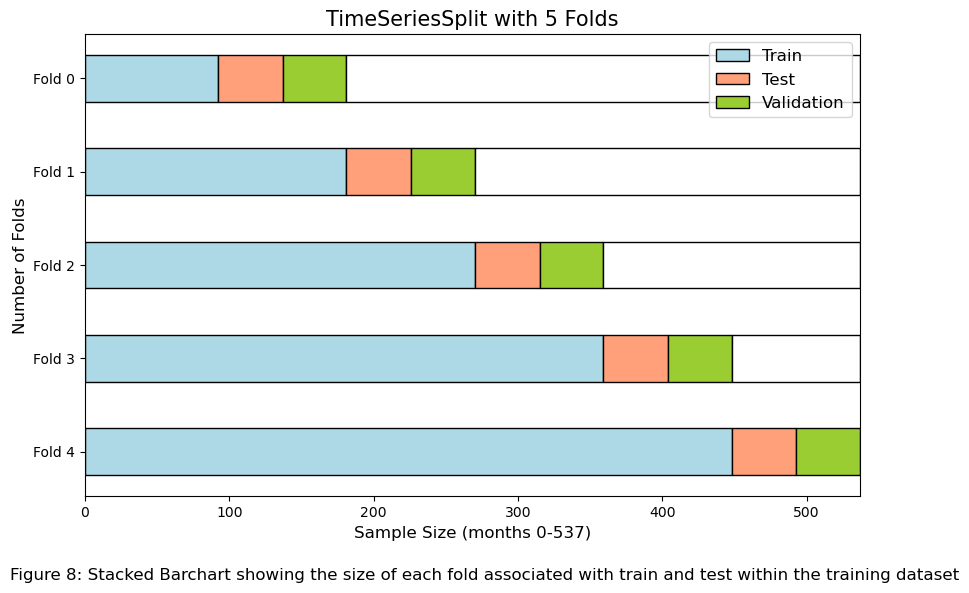

In [38]:
import matplotlib.pyplot as plt

#number of folds
folds = 5

#sizes of train and test data for each fold (from previous split)
train_sizes = [92,181,270,359,448]
test_sizes = [45,45,45,45,45]
val_sizes = [44,44,44,44,44]

#Total size of the test set (375 samples)
total_size = 537

#fold labels (y-axis) - reversed to have Fold 0 at the top
fold_labels = [f'Fold {i}' for i in range(folds-1, -1, -1)]

#set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#create horizontal stacked bars
for i in range(folds):
    #plot train section
    ax.barh(folds-1-i, train_sizes[i], color='lightblue', edgecolor='black', height=0.5, label='Train' if i == 0 else "")
    
    #plot test section 
    ax.barh(folds-1-i, test_sizes[i], left=train_sizes[i], color='lightsalmon', edgecolor='black', height=0.5, label='Test' if i == 0 else "")

    ax.barh(folds-1-i, val_sizes[i], left=train_sizes[i] + test_sizes[i], color='yellowgreen', edgecolor='black', height=0.5, label='Validation' if i == 0 else "")
    
    #plot the remaining portion (white with black outline) for folds 0-3 (not needed for fold 4 since it's fully used)
    if i < folds-1:
        remaining = total_size - (train_sizes[i] + test_sizes[i] + val_sizes[i])
        ax.barh(folds-1-i, remaining, left=train_sizes[i] + test_sizes[i] + val_sizes[i], color='white', edgecolor='black', height=0.5)

#set labels, limits, and title
ax.set_yticks(range(folds))
ax.set_yticklabels(fold_labels)
ax.set_xlim(0, total_size)
ax.set_xlabel('Sample Size (months 0-537)', fontsize=12)
ax.set_ylabel('Number of Folds', fontsize=12)
ax.set_title('TimeSeriesSplit with 5 Folds', fontsize=15)
ax.legend(loc='upper right', fontsize=12)

plt.figtext(0.05, -0.03, 'Figure 8: Stacked Barchart showing the size of each fold associated with train and test within the training dataset', size=12)

plt.show()


### Pre-processing 

In [128]:
#features to calculate min and max for
features = ['year', 'year_month', 'month_sin', 'month_cos', 
            'airfrost_days', 
            'totalsun_hours', 
            'tmax_degC', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12','tmax_degC_avg4',
            'totalrain_mm', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'totalrain_mm_avg4']

#calculate min and max for each feature
min_values = df_features[features].min()
max_values = df_features[features].max()

print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
year                     1976
year_month            1976_04
month_sin                -1.0
month_cos                -1.0
airfrost_days               0
totalsun_hours            5.8
tmax_degC                 1.0
tmax_degC_lag_1           1.0
tmax_degC_lag_6           1.0
tmax_degC_lag_12          1.0
tmax_degC_avg4           4.25
totalrain_mm              4.6
totalrain_mm_lag1         4.6
totalrain_mm_lag6         4.6
totalrain_mm_lag12        4.6
totalrain_mm_avg4        16.2
dtype: object

Maximum values for each feature:
year                     2020
year_month            2020_12
month_sin                 1.0
month_cos                 1.0
airfrost_days              25
totalsun_hours          290.8
tmax_degC                25.6
tmax_degC_lag_1          25.6
tmax_degC_lag_6          25.6
tmax_degC_lag_12         25.6
tmax_degC_avg4         22.025
totalrain_mm            285.6
totalrain_mm_lag1       285.6
totalrain_mm_lag6       285.6
totalrain_mm_lag12 

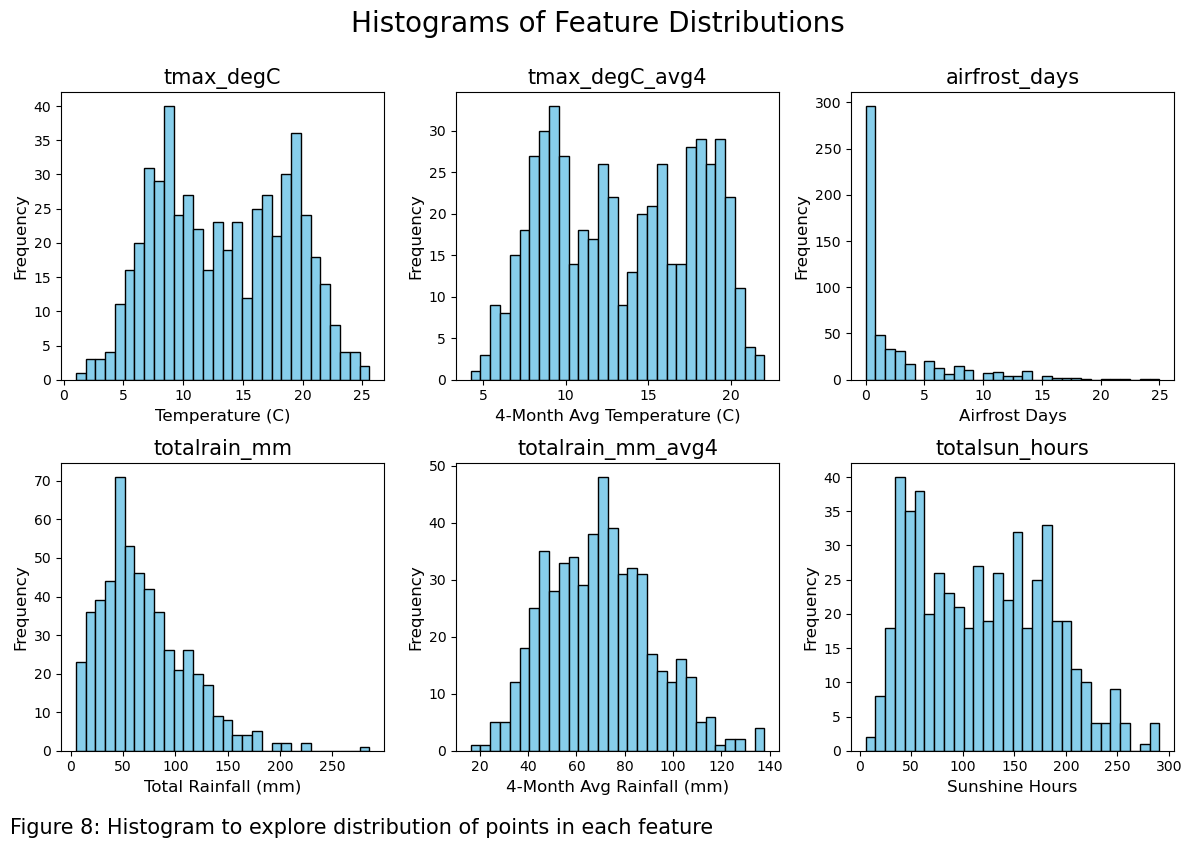

In [138]:
import matplotlib.pyplot as plt

# List of features to plot histograms for
features = ['tmax_degC', 'tmax_degC_avg4', 'airfrost_days', 'totalrain_mm', 'totalrain_mm_avg4', 'totalsun_hours']

# List of x-axis labels corresponding to the features
x_labels = ['Temperature (C)', '4-Month Avg Temperature (C)', 'Airfrost Days', 'Total Rainfall (mm)', '4-Month Avg Rainfall (mm)', 
            'Sunshine Hours']

# Set up the figure and axes for the 3x4 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # 3 rows and 4 columns
fig.suptitle('Histograms of Feature Distributions', fontsize=20, y=1.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot a histogram
for i, feature in enumerate(features):
    axes[i].hist(df_features[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature}', fontsize=15)
    axes[i].set_xlabel(x_labels[i], fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.figtext(0.01, -0.03, 'Figure 8: Histogram to explore distribution of points in each feature', size=15)

# Show the plots
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

s_ftrs = ['tmax_degC', 'totalsun_hours', 'tmax_degC_avg4', 'totalrain_mm',
          'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12','tmax_degC_avg4',
          'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
          'totalrain_mm_avg4', 'month_sin', 'month_cos', 'airfrost_days']

Sscaler = StandardScaler()
print('Training Folds 1:', Sscaler.fit_transform(X_train_folds['train_fold_1'][s_ftrs]))
print('Training Folds 2:', Sscaler.fit_transform(X_train_folds['train_fold_2'][s_ftrs]))
print('Training Folds 3:', Sscaler.fit_transform(X_train_folds['train_fold_3'][s_ftrs]))
print('Training Folds 4:', Sscaler.fit_transform(X_train_folds['train_fold_4'][s_ftrs]))
print('Training Folds 5:', Sscaler.fit_transform(X_train_folds['train_fold_5'][s_ftrs]))

print('X_val_folds', Sscaler.transform(X_val[s_ftrs]))
print('X_test_folds', Sscaler.transform(X_test[s_ftrs]))

Training Folds 1: [[-0.22641546  0.06535632 -0.27983397 ...  1.26195007 -0.67118057
  -0.20301399]
 [ 0.49857529  0.59782333  0.16301635 ...  0.74396928 -1.18916137
  -0.57655972]
 [ 1.64795087  2.26239712  0.77868631 ...  0.03639435 -1.3787555
  -0.57655972]
 ...
 [ 0.67540231  0.0784632   1.58877837 ... -1.3787555   0.03639435
  -0.57655972]
 [ 0.10955587 -0.45891889  1.35115136 ... -1.18916137  0.74396928
  -0.20301399]
 [-0.54470408 -1.36165527  0.56266176 ... -0.67118057  1.26195007
   0.35730462]]
Training Folds 2: [[-0.21590559  0.0437902  -0.26954454 ...  1.21632728 -0.70417879
  -0.21745737]
 [ 0.52381526  0.53623108  0.18239627 ...  0.69939088 -1.2225373
  -0.59774514]
 [ 1.69654345  2.07567703  0.81070422 ... -0.00675737 -1.41226968
  -0.59774514]
 ...
 [-1.46080166 -1.03200373 -1.42695392 ...  1.21632728  0.712003
   2.44455701]
 [-0.39632531 -0.7910865  -1.32223593 ...  1.40553914  0.0039121
  -0.40760125]
 [-0.2700315   0.24379695 -1.06319668 ...  1.21632728 -0.70417879
 